<a href="https://colab.research.google.com/github/pruthwiraj2003/AI-DS/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
np.random.seed(42)
n_customer=500
ages=np.random.randint(18,70,n_customer)
gender=np.random.randint(0,2,n_customer)
income=np.random.normal(50,15,n_customer)
purchase_freq=np.random.poisson(3,n_customer)
churn=((income<40)&(purchase_freq<3))
df_customers=pd.DataFrame({
    'Age':ages,
    'Gender':gender,
    'Income':income,
    'PurchaseFrequency':purchase_freq,
    'Churn':churn

})
df_customers.to_csv('customers.csv',index=False)
print("Cuistomer  data created and saved to 'customers.csv'")
print(df_customers.head())


Cuistomer  data created and saved to 'customers.csv'
   Age  Gender     Income  PurchaseFrequency  Churn
0   56       1  24.449263                  2   True
1   69       0  49.166785                  2  False
2   46       0  55.760982                  4  False
3   32       1  49.509579                  4  False
4   60       0  18.988368                  1   True


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df=pd.read_csv("customers.csv")
df.head()

,Age,Gender,Income,PurchaseFrequency,Churn
0,56,1,24.449263,2,True
1,69,0,49.166785,2,False
2,46,0,55.760982,4,False
3,32,1,49.509579,4,False
4,60,0,18.988368,1,True


In [4]:
df.info()
df.isnull().sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    int64  
 1   Gender             500 non-null    int64  
 2   Income             500 non-null    float64
 3   PurchaseFrequency  500 non-null    int64  
 4   Churn              500 non-null    bool   
dtypes: bool(1), float64(1), int64(3)
memory usage: 16.2 KB


<bound method DataFrame.sum of        Age  Gender  Income  PurchaseFrequency  Churn
0    False   False   False              False  False
1    False   False   False              False  False
2    False   False   False              False  False
3    False   False   False              False  False
4    False   False   False              False  False
..     ...     ...     ...                ...    ...
495  False   False   False              False  False
496  False   False   False              False  False
497  False   False   False              False  False
498  False   False   False              False  False
499  False   False   False              False  False

[500 rows x 5 columns]>

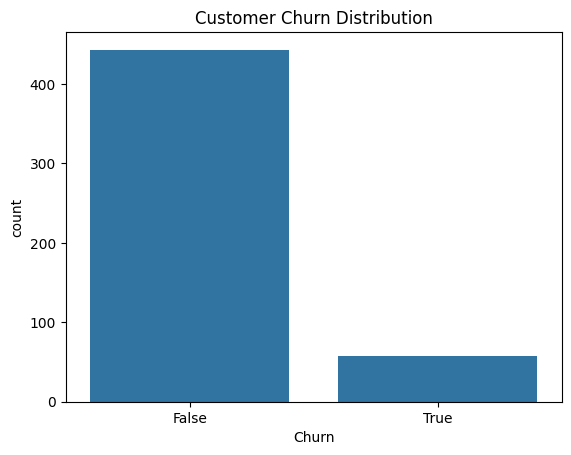

In [7]:
sns.countplot(data=df,x='Churn')
plt.title("Customer Churn Distribution")

plt.show()

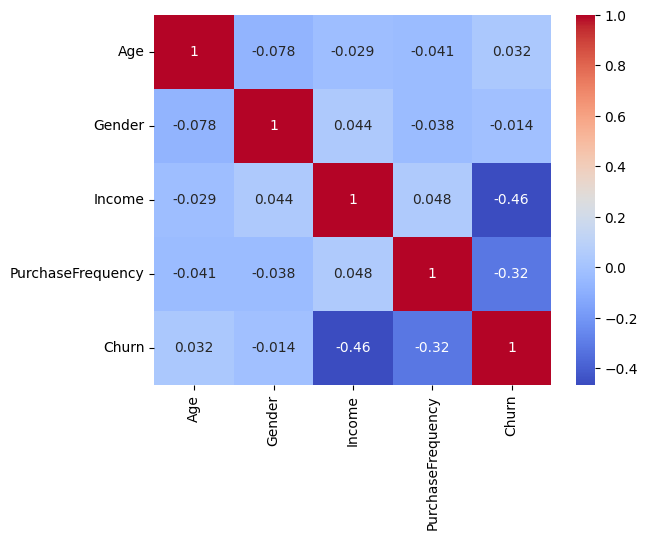

In [8]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show("Correlation Matrix")
plt.show()


In [10]:
x=df.drop("Churn",axis=1)
y=df["Churn"]
x_train,x_test,y_train , y_test=train_test_split(
    x,y,test_size=0.2, random_state=42

)

In [12]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Accuracy Score  0.91
Confusion Matrix:
 [[85  2]
 [ 7  6]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.95        87
        True       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



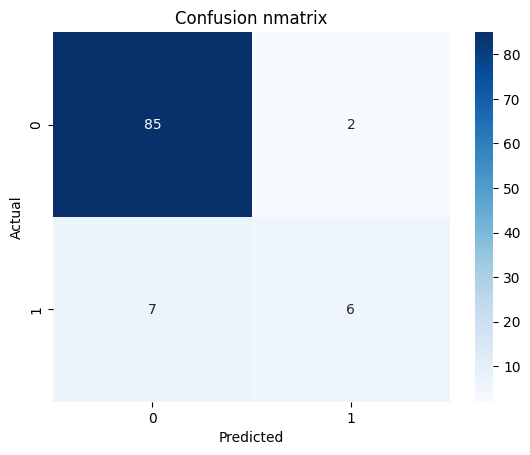

In [15]:
y_pred=model.predict(x_test)
print("Accuracy Score ",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print("Classification Report:\n",classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title("Confusion nmatrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
new_customer=pd.DataFrame({
    'Age':[28],
    'Gender':[1],
    'Income':[37],
    'PurchaseFrequency':[2]
})


prediction  = model.predict(new_customer)[0]
if prediction == 1:
  print("This Customer is likely to CHURN.Considering offering retention benifits.")
else:
  print("The customer is likely to Stay .continue engagement as usual ")


The customer is likely to Stay .continue engagement as usual 
